In [1]:
import numpy as np
import cv2

In [2]:
import insightface

In [19]:
### Load Model

In [3]:

import cv2
import numpy as np
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

# Method-1, use FaceAnalysis
app = FaceAnalysis(allowed_modules=['detection','recognition','genderage']) # enable detection model only
app.prepare(ctx_id=0, det_size=(640, 640))

# Method-2, load model directly
# detector = insightface.model_zoo.get_model('your_detection_model.onnx')
# detector.prepare(ctx_id=0, input_size=(640, 640))


C:\code\face attendace\test\facial_attendance\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\prave/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\prave/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\prave/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\prave/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\prave/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [4]:
import matplotlib.pyplot as plt

img = cv2.imread("Holyfamily-1024x538.jpg")
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destoryAllWindows()

# if img is None:
#     print("Error: Image not found or failed to load.")
# else:
    # Convert BGR (OpenCV default) to RGB for matplotlib
    # img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display using matplotlib
#     plt.imshow(img)
#     plt.title("Holy Family")
#     plt.axis('off')
#     plt.show()
# result = app.get(img)

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [40]:
result

[{'bbox': array([576.53253, 168.46552, 787.827  , 384.7072 ], dtype=float32),
  'kps': array([[623.64014, 296.73752],
         [684.943  , 253.89465],
         [664.65826, 326.6314 ],
         [689.26355, 359.9058 ],
         [730.0757 , 323.80728]], dtype=float32),
  'det_score': np.float32(0.79215723),
  'gender': np.int64(0),
  'age': 22,
  'embedding': array([ 1.48938251e+00, -1.41936028e+00, -1.80284524e+00,  4.90771085e-01,
         -8.11835825e-01, -1.01000369e+00, -1.28200769e+00,  5.37368894e-01,
         -1.30365634e+00,  4.35541302e-01,  2.25011930e-02, -1.16196775e+00,
          2.56782031e+00, -1.75060749e-01,  6.12165928e-01,  5.26512682e-01,
          6.06036838e-03, -1.05440378e+00, -1.90452039e-02,  1.76242858e-01,
         -6.70049429e-01,  1.42503488e+00, -9.08256114e-01, -1.26457822e+00,
         -4.07674730e-01,  3.82896751e-01,  5.25141776e-01,  3.61400187e-01,
          7.42686763e-02, -1.47829211e+00,  2.60996521e-01,  1.35023427e+00,
         -1.49933887e+00, -

In [41]:
len(result)

3

In [126]:
# !pip install jupyter_contrib_nbextensions

In [31]:
import os
import os
print("Current directory:", os.getcwd())


Current directory: C:\code\face attendace\test


In [42]:
result[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'gender', 'age', 'embedding'])

In [88]:
result[0]['age']

22

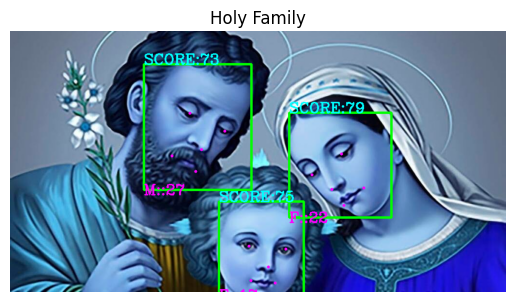

In [94]:
img_copy = img.copy()
for res in result:
    x1, y1, x2,y2 = res["bbox"].astype(int)
    cv2.rectangle(img_copy,(x1,y1),(x2,y2),(0,255,0),3)

    kps = res['kps'].astype(int)

    for k1, k2 in kps:
        cv2.circle(img_copy, (k1,k2),3,(255,0,255),-1)

    score = f"SCORE:{int(res["det_score"]*100)}"
    cv2.putText(img_copy, score, (x1, y1),cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255,255), 2 )

    gender = ""
    if res['gender'] == 1:
        gender = 'M'
    else:
        gender = 'F'

    age = res["age"]    
    cv2.putText(img_copy, f"{gender}::{age}",(x1,y2+10),cv2.FONT_HERSHEY_COMPLEX, 1, (255,0, 255), 2)

plt.imshow(img_copy)
plt.title("Holy Family")
plt.axis('off')
plt.show()
    

## print(x1, y1)

In [200]:
import os
os.getcwd()

'C:\\code\\face attendace\\test'

In [201]:
src = 'images'
os.listdir(src)

['student-Angelina Jolie',
 'student-Chris_Evans',
 'student-Scarlett Johansson',
 'teacher-Barack_Obama',
 'teacher-Morgan_Freeman']

In [202]:
face_app = FaceAnalysis(name = "buffalo_l",
                   root = "insightface",
                   providers = ["CUDAExecutionProvider"])
face_app.prepare(ctx_id = 0, det_thresh = 0.5, det_size = (640, 640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [203]:
registered_users = os.listdir(src)
gender = ["F", "M"]
person_info = []

for usr in registered_users:
    role, name = usr.split("-")
    print(role, name)

    fpath = src + "\\" + usr

    fname =  os.listdir(fpath)

    print(f"Path: {fname}")

    for i, l in enumerate(fname):

        print(f"fpath + l : {fpath + l}")

        per_img = cv2.imread(fpath + "\\" + l)
        img_cp = per_img.copy()

        embedding = face_app.get(img_cp,max_num = 1)

        # print("EMBEDDING")
        # print(embedding)

        # print(embedding[0]['embedding'])


        person_info.append([role, name, embedding[0]["embedding"], gender[embedding[0]["gender"]],embedding[0]["age"]])
    
        # plt.imshow(img_cp)
        # plt.title(name + " " +str(i+1))
        # plt.axis('off')
        # plt.show()

    print("******")


student Angelina Jolie
Path: ['angelina-1.jpeg', 'angelina-10.jpeg', 'angelina-2.jpeg', 'angelina-3.jpeg', 'angelina-4.jpeg', 'angelina-5.jpeg', 'angelina-6.jpeg', 'angelina-7.jpeg', 'angelina-8.jpeg', 'angelina-9.jpeg']
fpath + l : images\student-Angelina Jolieangelina-1.jpeg
fpath + l : images\student-Angelina Jolieangelina-10.jpeg
fpath + l : images\student-Angelina Jolieangelina-2.jpeg
fpath + l : images\student-Angelina Jolieangelina-3.jpeg
fpath + l : images\student-Angelina Jolieangelina-4.jpeg
fpath + l : images\student-Angelina Jolieangelina-5.jpeg
fpath + l : images\student-Angelina Jolieangelina-6.jpeg
fpath + l : images\student-Angelina Jolieangelina-7.jpeg
fpath + l : images\student-Angelina Jolieangelina-8.jpeg
fpath + l : images\student-Angelina Jolieangelina-9.jpeg
******
student Chris_Evans
Path: ['evans_1.jpeg', 'evans_10.jpeg', 'evans_2.jpeg', 'evans_3.jpeg', 'evans_4.jpeg', 'evans_5.jpeg', 'evans_6.jpeg', 'evans_7.jpeg', 'evans_8.jpeg', 'evans_9.jpeg']
fpath + l : i

In [204]:
import pandas as pd

df = pd.DataFrame(person_info, columns=["role","name","embedding","gender","age"])
df

,role,name,embedding,gender,age
0,student,Angelina Jolie,"[0.0782051, 1.9014968, -0.023446217, -0.933483...",F,44
1,student,Angelina Jolie,"[0.23100796, 0.97979903, -0.7245442, -0.320747...",F,28
2,student,Angelina Jolie,"[0.07114025, 2.1640797, -0.3409794, -0.7474305...",F,38
3,student,Angelina Jolie,"[0.4855187, 2.1145895, 0.44635487, -0.664585, ...",F,42
4,student,Angelina Jolie,"[-0.088249624, 1.5136455, -0.18718192, -1.3422...",F,38
5,student,Angelina Jolie,"[-0.5457795, 1.531904, -0.12923735, -1.1520246...",F,35
6,student,Angelina Jolie,"[0.944698, 1.6263462, -0.2519764, -1.4123573, ...",F,40
7,student,Angelina Jolie,"[0.42329496, 0.33404857, 0.12039175, 0.0759726...",F,36
8,student,Angelina Jolie,"[-0.3635006, 1.3725694, 0.06796405, -0.8572356...",F,42
9,student,Angelina Jolie,"[0.7520718, 1.2098386, 0.043703556, -1.4506801...",F,28


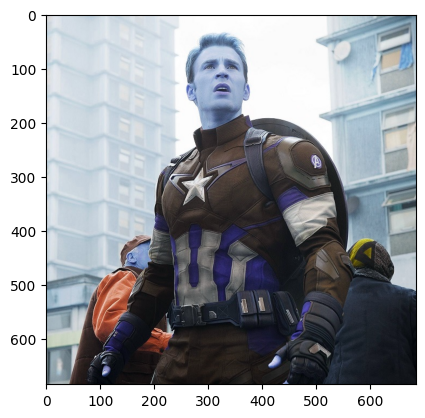

In [216]:
test_img_path = "test_images" + "\\" + "test_2.jpeg"
test_img_path

test_img = cv2.imread(test_img_path)

test_embedding = face_app.get(test_img,max_num = 1)[0]['embedding']
test_embedding

In [149]:
test_embedding.shape

(512,)

In [206]:
from sklearn.metrics import pairwise

In [207]:
X_list = df["embedding"].tolist()
X = np.asarray(X_list)
X.shape

(50, 512)

In [208]:
y = test_embedding.reshape(1,-1) #or(1, 512)
y.shape

(1, 512)

In [209]:
cosine_similarity_score = pairwise.cosine_similarity(X, y )
cosine_similarity_score

df["cosine_similarity_score"] = cosine_similarity_score
df

,role,name,embedding,gender,age,cosine_similarity_score
0,student,Angelina Jolie,"[0.0782051, 1.9014968, -0.023446217, -0.933483...",F,44,-0.004487
1,student,Angelina Jolie,"[0.23100796, 0.97979903, -0.7245442, -0.320747...",F,28,0.013865
2,student,Angelina Jolie,"[0.07114025, 2.1640797, -0.3409794, -0.7474305...",F,38,0.025893
3,student,Angelina Jolie,"[0.4855187, 2.1145895, 0.44635487, -0.664585, ...",F,42,0.031181
4,student,Angelina Jolie,"[-0.088249624, 1.5136455, -0.18718192, -1.3422...",F,38,0.021965
5,student,Angelina Jolie,"[-0.5457795, 1.531904, -0.12923735, -1.1520246...",F,35,-0.007491
6,student,Angelina Jolie,"[0.944698, 1.6263462, -0.2519764, -1.4123573, ...",F,40,0.019033
7,student,Angelina Jolie,"[0.42329496, 0.33404857, 0.12039175, 0.0759726...",F,36,-0.009802
8,student,Angelina Jolie,"[-0.3635006, 1.3725694, 0.06796405, -0.8572356...",F,42,0.036035
9,student,Angelina Jolie,"[0.7520718, 1.2098386, 0.043703556, -1.4506801...",F,28,0.009243


In [210]:
s_opt = 0.5

df_filtered = df.query(f"cosine_similarity_score > {s_opt}")

In [211]:
df_filtered.reset_index(drop = True, inplace = True)

if len(df_filtered) > 0:
    argmax = df_filtered["cosine_similarity_score"].argmax()
    name = df_filtered.loc[argmax]["name"]
    role = df_filtered.loc[argmax]["role"]
else:
    role = name = "unknown"

print(f"NAME: {name}", "\n", f"ROLE: {role}")

NAME: Chris_Evans 
 ROLE: student


In [252]:
def ml_search_algo(df,embed_col_name ,y, threshold = 0.5):
    X_list = df[embed_col_name].to_list()
    X = np.asarray(X_list)

    cosine_similarity_score = pairwise.cosine_similarity(X, y.reshape(1,-1))
    df["cosine_similarity_score"] = np.array(cosine_similarity_score).flatten()

    df_filtered = df.query(f"cosine_similarity_score > {threshold}")
    if len(df_filtered) > 0:
        df_filtered.reset_index(drop = True, inplace = True)
        argmax = df_filtered["cosine_similarity_score"].argmax()

        name = df_filtered.loc[argmax]["name"]
        role = df_filtered.loc[argmax]["role"]
    else:
        role = name = "Unknown"

    return name, role

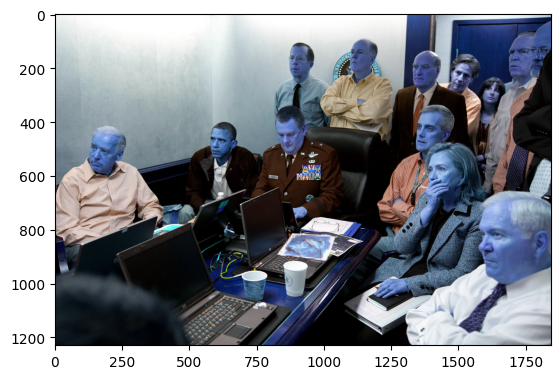

In [273]:
test_img_path = "test_images" + "\\" + "test_11.jpg"
test_img_path

test_img = cv2.imread(test_img_path)
test_img_cp = test_img.copy()

result = face_app.get(test_img_cp)
result
plt.imshow(test_img)

In [239]:
len(result)

13

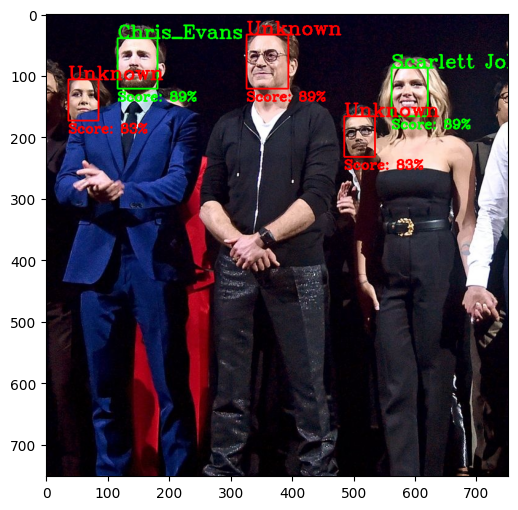

In [304]:
test_img_path = "test_images" + "\\" + "test_7.jpeg"
test_img_path

test_img = cv2.imread(test_img_path)
test_img_cp = test_img.copy()

result = face_app.get(test_img_cp)

for res in result:
    x1, y1, x2, y2 = res["bbox"].astype(int)
    embeddings = res["embedding"]
    score = res["det_score"]

    person_name, person_role = ml_search_algo(df,"embedding",y = embeddings,threshold = 0.5)

    if person_name == "Unknown":
        color = (0,0,255) #BGR
    else:
        color = (0,255,0)

    cv2.rectangle(test_img_cp,(x1,y1),(x2,y2), color, 2)

    cv2.putText(test_img_cp, f"{person_name}",(x1,y1), cv2.FONT_HERSHEY_COMPLEX, 1, color,2)

    cv2.putText(test_img_cp, f"Score: {int(score*100)}%",(x1,y2+20), cv2.FONT_HERSHEY_COMPLEX, 0.7, color,2)

    img_rgb = cv2.cvtColor(test_img_cp, cv2.COLOR_BGR2RGB)
    # print(person_name, person_role)

plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)

In [305]:
df.columns

Index(['role', 'name', 'embedding', 'gender', 'age',
       'cosine_similarity_score'],
      dtype='object')

In [309]:
df.head()

,role,name,embedding,gender,age,cosine_similarity_score
0,student,Angelina Jolie,"[0.0782051, 1.9014968, -0.023446217, -0.933483...",F,44,0.055115
1,student,Angelina Jolie,"[0.23100796, 0.97979903, -0.7245442, -0.320747...",F,28,-0.074903
2,student,Angelina Jolie,"[0.07114025, 2.1640797, -0.3409794, -0.7474305...",F,38,0.006636
3,student,Angelina Jolie,"[0.4855187, 2.1145895, 0.44635487, -0.664585, ...",F,42,-0.021809
4,student,Angelina Jolie,"[-0.088249624, 1.5136455, -0.18718192, -1.3422...",F,38,0.035108


In [310]:
df = df.drop(columns=['age', 'gender'])
df

,role,name,embedding,cosine_similarity_score
0,student,Angelina Jolie,"[0.0782051, 1.9014968, -0.023446217, -0.933483...",0.055115
1,student,Angelina Jolie,"[0.23100796, 0.97979903, -0.7245442, -0.320747...",-0.074903
2,student,Angelina Jolie,"[0.07114025, 2.1640797, -0.3409794, -0.7474305...",0.006636
3,student,Angelina Jolie,"[0.4855187, 2.1145895, 0.44635487, -0.664585, ...",-0.021809
4,student,Angelina Jolie,"[-0.088249624, 1.5136455, -0.18718192, -1.3422...",0.035108
5,student,Angelina Jolie,"[-0.5457795, 1.531904, -0.12923735, -1.1520246...",0.042472
6,student,Angelina Jolie,"[0.944698, 1.6263462, -0.2519764, -1.4123573, ...",-0.028049
7,student,Angelina Jolie,"[0.42329496, 0.33404857, 0.12039175, 0.0759726...",-0.038078
8,student,Angelina Jolie,"[-0.3635006, 1.3725694, 0.06796405, -0.8572356...",-0.003211
9,student,Angelina Jolie,"[0.7520718, 1.2098386, 0.043703556, -1.4506801...",-0.057097


In [311]:
df.drop('cosine_similarity_score', axis=1, inplace=True)

In [312]:
df_compress = df.groupby(['name','role']).mean()
df_compress

,,embedding
name,role,
Angelina Jolie,student,"[0.19884071350097657, 1.4748316764831544, -0.0..."
Barack_Obama,teacher,"[-0.2217794895172119, 1.57620849609375, -0.503..."
Chris_Evans,student,"[0.3569461822509766, -0.4149254322052002, 0.03..."
Morgan_Freeman,teacher,"[0.7627901077270508, 0.890574836730957, 0.4686..."
Scarlett Johansson,student,"[-0.13513925075531005, -0.28221137523651124, -..."


In [313]:
df_compress.reset_index(inplace = True)
df_compress

,name,role,embedding
0,Angelina Jolie,student,"[0.19884071350097657, 1.4748316764831544, -0.0..."
1,Barack_Obama,teacher,"[-0.2217794895172119, 1.57620849609375, -0.503..."
2,Chris_Evans,student,"[0.3569461822509766, -0.4149254322052002, 0.03..."
3,Morgan_Freeman,teacher,"[0.7627901077270508, 0.890574836730957, 0.4686..."
4,Scarlett Johansson,student,"[-0.13513925075531005, -0.28221137523651124, -..."


In [344]:
"""Basic connection example.
"""

import redis

r = redis.Redis(
    host='redis-18472.c322.us-east-1-2.ec2.redns.redis-cloud.com',
    port=18472,
    decode_responses=False,
    username="default",
    password="kQegO5M7KHeEwyfoHhrvlkglQLhsyInh",
)

success = r.set('foo', 'bar')
# True

result = r.get('foo')
print(result)
# >>> bar

r.ping()
r.keys()

b'bar'


[b'foo', b'thmc:register', b'key']

In [319]:
df.head()

,role,name,embedding
0,student,Angelina Jolie,"[0.0782051, 1.9014968, -0.023446217, -0.933483..."
1,student,Angelina Jolie,"[0.23100796, 0.97979903, -0.7245442, -0.320747..."
2,student,Angelina Jolie,"[0.07114025, 2.1640797, -0.3409794, -0.7474305..."
3,student,Angelina Jolie,"[0.4855187, 2.1145895, 0.44635487, -0.664585, ..."
4,student,Angelina Jolie,"[-0.088249624, 1.5136455, -0.18718192, -1.3422..."


In [323]:
df_compress['name_role'] = df_compress['name'] + '@' + df_compress['role']
df_compress.head()

,name,role,embedding,name_role
0,Angelina Jolie,student,"[0.19884071350097657, 1.4748316764831544, -0.0...",Angelina Jolie@student
1,Barack_Obama,teacher,"[-0.2217794895172119, 1.57620849609375, -0.503...",Barack_Obama@teacher
2,Chris_Evans,student,"[0.3569461822509766, -0.4149254322052002, 0.03...",Chris_Evans@student
3,Morgan_Freeman,teacher,"[0.7627901077270508, 0.890574836730957, 0.4686...",Morgan_Freeman@teacher
4,Scarlett Johansson,student,"[-0.13513925075531005, -0.28221137523651124, -...",Scarlett Johansson@student


In [327]:
records = df_compress[['name_role', 'embedding']].to_dict(orient = 'records')
records[0]

{'name_role': 'Angelina Jolie@student',
 'embedding': array([ 1.98840714e-01,  1.47483168e+00, -9.78951335e-02, -8.80477905e-01,
        -4.95817232e-01,  6.36755180e-01,  7.20393562e-01,  4.32236719e-01,
        -1.01360493e+00, -2.19173598e-01, -1.25163803e+00,  6.02926016e-03,
        -1.09006453e+00, -9.10641956e-01,  9.80028534e-01, -8.09101391e-01,
        -3.22009897e-01, -3.24510980e-01, -1.63174987e-01, -2.94847393e-01,
         6.83725405e-01,  3.98867512e-01, -3.36571145e-01, -3.36665583e-01,
        -1.28407240e-01,  1.73714972e-01,  5.91784859e-01, -6.08609724e-01,
         1.05130901e+00,  7.50668335e-01,  5.74431956e-02, -4.44795322e-01,
         7.35006618e-01, -1.39606819e+00,  5.44335794e-01,  1.25652637e+00,
         1.07505012e-01, -3.43789601e-01, -1.06015563e-01,  1.95724716e+00,
         6.32463408e-01,  5.08063889e-01,  5.25575447e-01, -2.17058182e-02,
        -8.33805370e-01, -5.27180195e-02, -2.05277109e-01,  8.91043663e-01,
        -4.69541121e-01, -5.0267815

In [330]:
for record in records:
    name_role = record['name_role']
    vector = record['embedding'].tobytes() #for using hash ds in redis

    r.hset(name = 'thmc:register', key=name_role, value = vector)

In [358]:
# r.hgetall(name = 'thmc:register')
# r.ping()

retrieve_dict = r.hgetall('thmc:register')
retrieve_series = pd.Series(retrieve_dict)
retrieve_series = retrieve_series.apply(lambda x: np.frombuffer(x, dtype = np.float32))
index = retrieve_series.index
index = list(map(lambda x: x.decode(), index))
retrieve_series.index = index
retrieve_series

retrieve_df = retrieve_series.to_frame().reset_index()
retrieve_df.columns = ["name_role","embeddings"]
retrieve_df

retireve_df[['name','role']] = retrieve_df['name_role'].apply(lambda x:x.split('@')).apply(pd.Series)

retireve_df.columns = ["key","embedding","name","role"]
retireve_df                                                                                         
# Each key and value will be in raw `bytes` format
# for k, v in data.items():
#     print(k.decode('utf-8'), v)  # decode manually only if you're sure it's UTF-8

,key,embedding,name,role
0,Morgan_Freeman@teacher,"[-107374184.0, 1.8156974, -107374184.0, 1.8476...",Morgan_Freeman,teacher
1,Chris_Evans@student,"[-107374184.0, 1.678473, 2.720083e+23, -1.7074...",Chris_Evans,student
2,Angelina Jolie@student,"[-107374184.0, 1.5738406, 1.5881868e-23, 1.934...",Angelina Jolie,student
3,Barack_Obama@teacher,"[4.172325e-08, -1.5967795, 2.720083e+23, 1.947...",Barack_Obama,teacher
4,Scarlett Johansson@student,"[4.172325e-08, -1.5101392, 107374184.0, -1.641...",Scarlett Johansson,student


In [359]:
for i in retireve_df['embedding']:
    print(i.shape, i.dtype)

(1024,) float32
(1024,) float32
(1024,) float32
(1024,) float32
(1024,) float32


In [361]:
for i in df_compress['embedding']:
    print(i.shape, i.dtype)

(512,) float64
(512,) float64
(512,) float64
(512,) float64
(512,) float64


In [337]:
import numpy as np
import cv2 as cv
 
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
 
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
 
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
